In [204]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib
from scipy.optimize import curve_fit
from scipy.ndimage import gaussian_filter

x_bins=60;y_bins=60;z_bins=240
sim=pd.read_csv("D:Desktop/helpingjade/results/dosetomedium_helpingjade.csv",delimiter= ',',comment='#',names=['x','y','z','dose'])
sim= sim.dose.values.reshape(x_bins, y_bins, z_bins)
sim=sim.T
sim=sim/(1.60218e-19)*(100*10**-12)*2





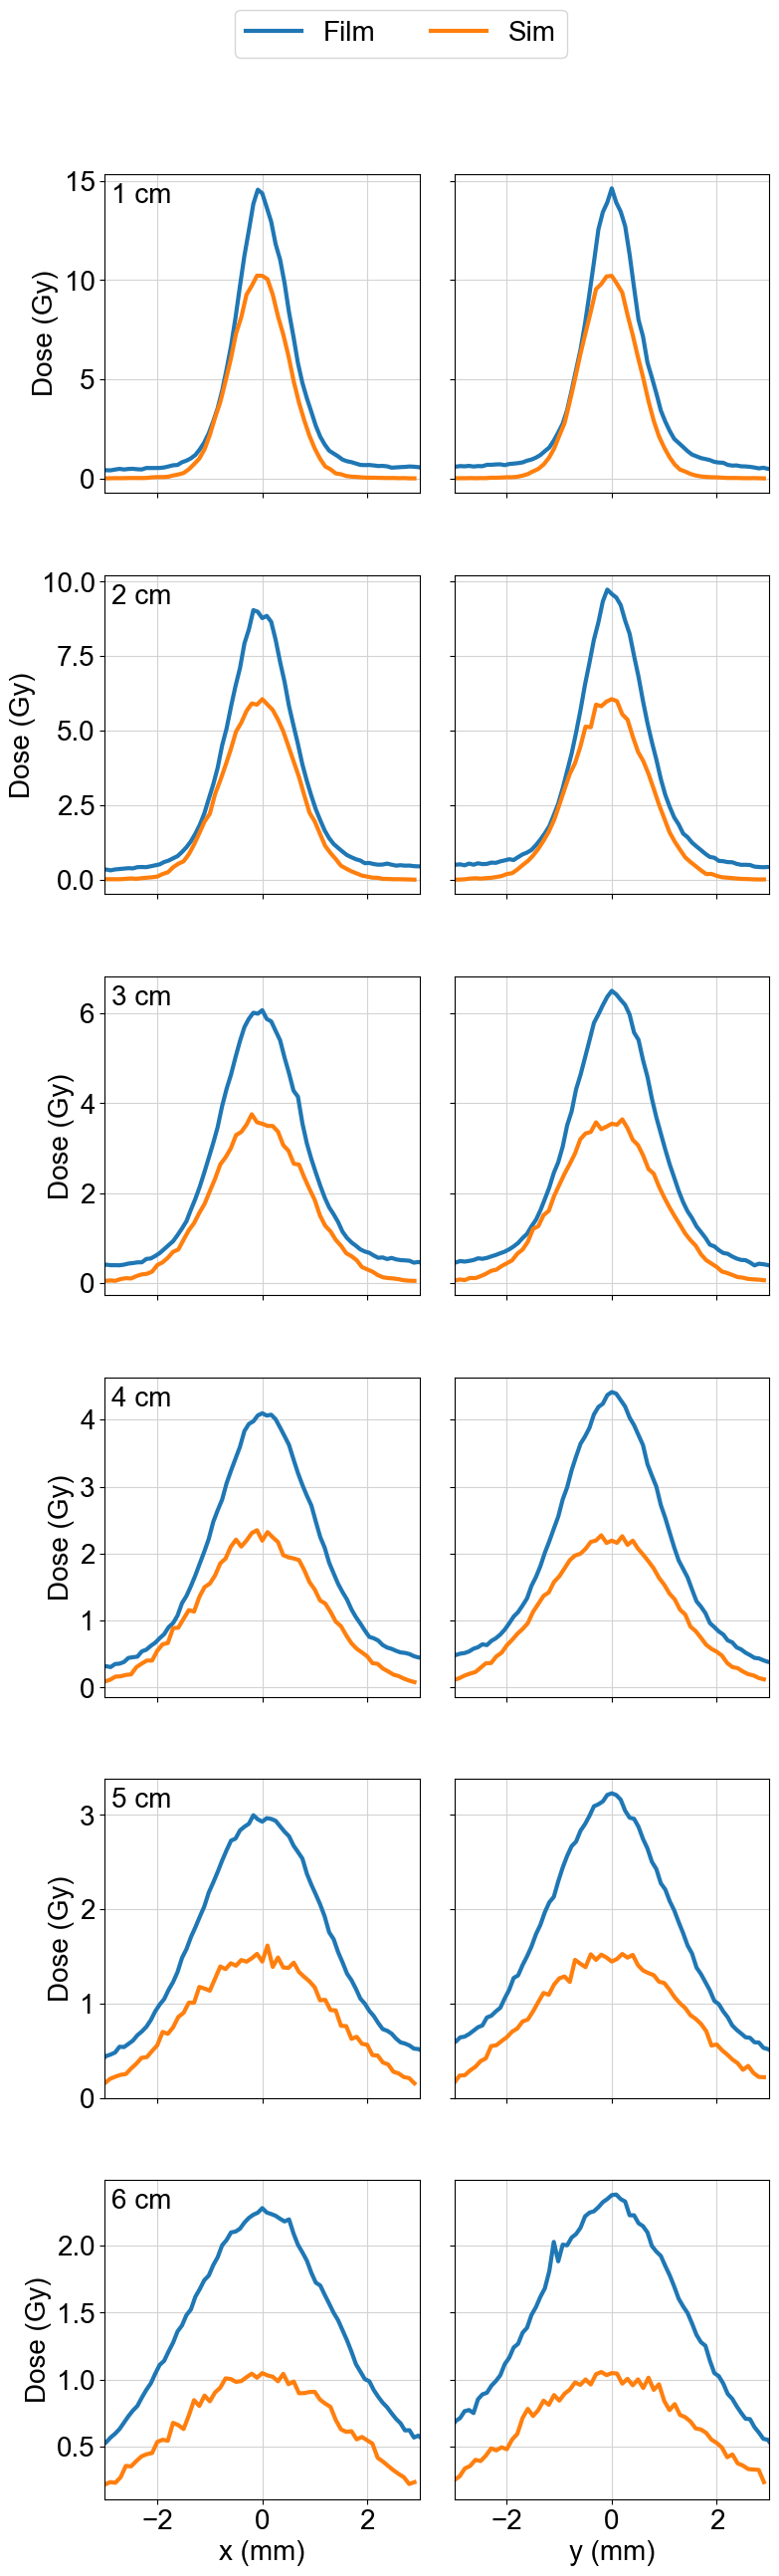

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

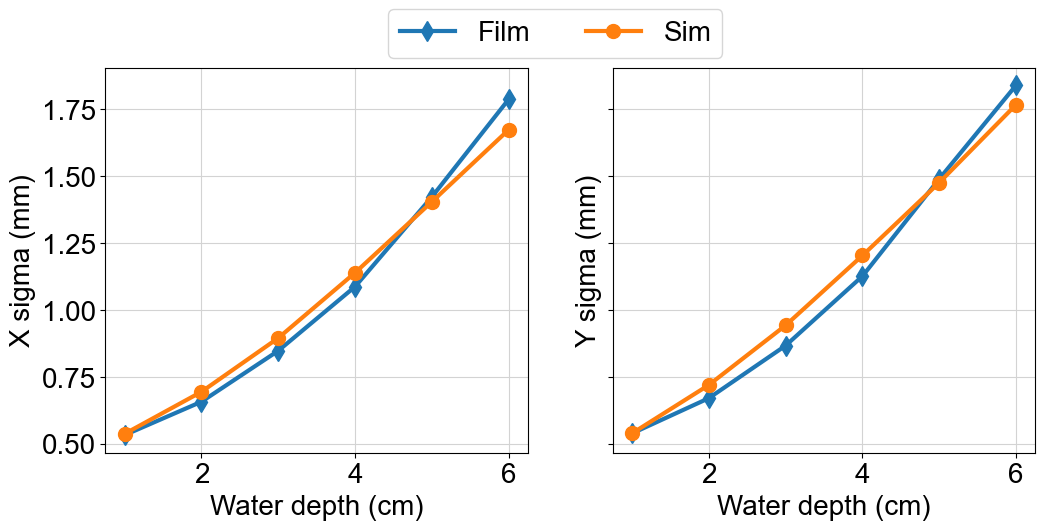

In [202]:
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font)
plt.rcParams['axes.axisbelow'] = True

z=[1,2,3,4,5,6]
filmx=[]
filmy=[]
for i in np.arange(1,7):
    filmx.append(np.load("D:Desktop/helpingjade/film_x_"+str(i)+".npy"))
    filmy.append(np.load("D:Desktop/helpingjade/film_y_"+str(i)+".npy"))

def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

def gauss_fit(xdata,ydata):
    

    mean = sum(xdata * ydata) / sum(ydata)
    sigma = np.sqrt(sum(ydata * (xdata - mean)**2) / sum(ydata))
    popt,pcov = curve_fit(gaus,xdata,ydata,p0=[max(ydata), mean, sigma])
    #plt.plot(xdata,gaus(xdata,*popt),label='Gaussian fit',lw=1)
    return popt[-1],np.sqrt(np.diag(pcov))[-1]


xsigma_film=[]
xsigma_sim=[]
ysigma_film=[]
ysigma_sim=[]
for i in np.arange(1,7):
    xsigma_film.append(gauss_fit(np.arange(0,len(filmx[i-1]))*0.085,filmx[i-1])[0])
    xsigma_sim.append(gauss_fit(np.arange(0,len(sim[i*40-1,30]))*0.1+1.1,sim[i*40-1,30])[0])
    ysigma_film.append(gauss_fit(np.arange(0,len(filmy[i-1]))*0.085,filmy[i-1])[0])
    ysigma_sim.append(gauss_fit(np.arange(0,len(sim[i*40-1,:,30]))*0.1+1.1,sim[i*40-1,:,30])[0])


    
fig, ax = plt.subplots(6, 2,figsize=(8,25),dpi=100,sharex=True,sharey='row')
for i in np.arange(1,7):
    figure(i,figsize=(6,6))
    ax[i-1,0].plot((np.arange(0,len(filmx[i-1]))-np.argmax(gaussian_filter(filmx[i-1],sigma=5)))*0.085,filmx[i-1],lw=3,label='Film')
    ax[i-1,0].plot(np.arange(0,len(sim[i*40-1,30]))*0.1-3,sim[i*40-1,30],lw=3,label='Sim')
    ax[i-1,0].set_xlim(-3,3)
    ax[i-1,1].plot((np.arange(0,len(filmy[i-1]))-np.argmax(gaussian_filter(filmy[i-1],sigma=5)))*0.085,filmy[i-1],lw=3)
    ax[i-1,1].plot(np.arange(0,len(sim[i*40-1,:,30]))*0.1-3,sim[i*40-1,:,30],lw=3)
    ax[i-1,1].set_xlim(-3,3)
    ax[i-1,0].grid(c='lightgray',zorder=0)
    ax[i-1,1].grid(c='lightgray',zorder=0)
    ax[i-1,0].annotate(str(i)+' cm',(5,210),xycoords='axes points')
ax[5,0].set_xlabel('x (mm)')
ax[5,1].set_xlabel('y (mm)')
for i in np.arange(0,6):
    ax[i,0].set_ylabel('Dose (Gy)')
handles, labels = ax[0,0].get_legend_handles_labels()
fig.legend(handles,labels,bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower center", borderaxespad=0, ncol=2)
fig.tight_layout()

fig,ax =plt.subplots(1,2,figsize=(12,5),sharey=True)
ax[0].grid(c='lightgray',zorder=0)
ax[1].grid(c='lightgray',zorder=0)
ax[0].plot(z,xsigma_film,marker='d',ms=10,label='Film',lw=3)
ax[0].plot(z,xsigma_sim,ms=10,label='Sim',lw=3,marker='o')
ax[1].plot(z,ysigma_film,marker='d',ms=10,lw=3)
ax[1].plot(z,ysigma_sim,ms=10,lw=3,marker='o')
ax[0].set_ylabel('X sigma (mm)')
ax[1].set_ylabel('Y sigma (mm)')
ax[0].set_xlabel('Water depth (cm)')
ax[1].set_xlabel('Water depth (cm)')
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles,labels,bbox_to_anchor=(0, 0.9, 1, 0.2), loc="lower center", borderaxespad=0, ncol=2)


figure(17,figsize=(6,6))
plt.plot()

